### **box cox transform**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv("concrete_data.csv")
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [19]:
df.shape
df.isnull().sum()
# df.describe()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [20]:
X = df.drop(columns=["Strength"])
y = df["Strength"]

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)


In [21]:
lr = LinearRegression()
lr.fit(X_train , y_train);
y_pred = lr.predict(X_test)
round(r2_score(y_test , y_pred)*100,2)

62.76

In [23]:
# cross checking
# calculate mean r2 score using cross validation cv times 
lr = LinearRegression()
round(cross_val_score(lr , X , y , scoring="r2" , cv=5).mean()*100,2)

np.float64(46.1)

In [24]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


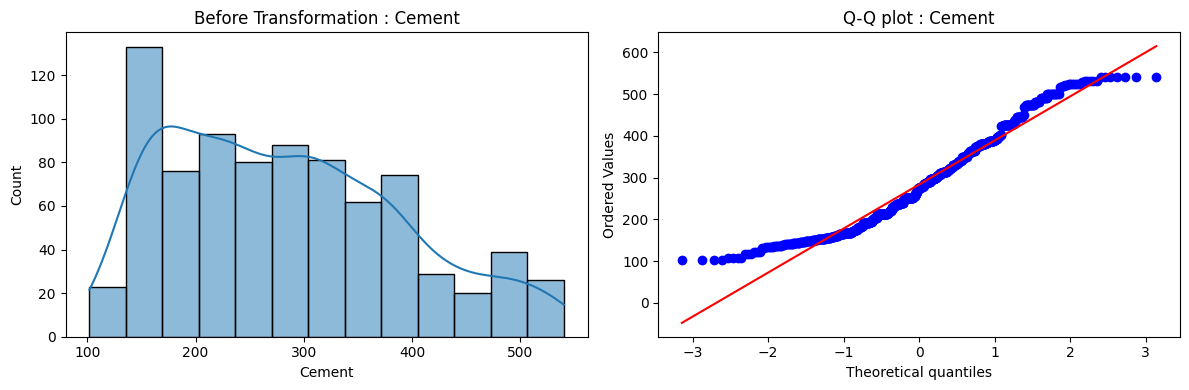

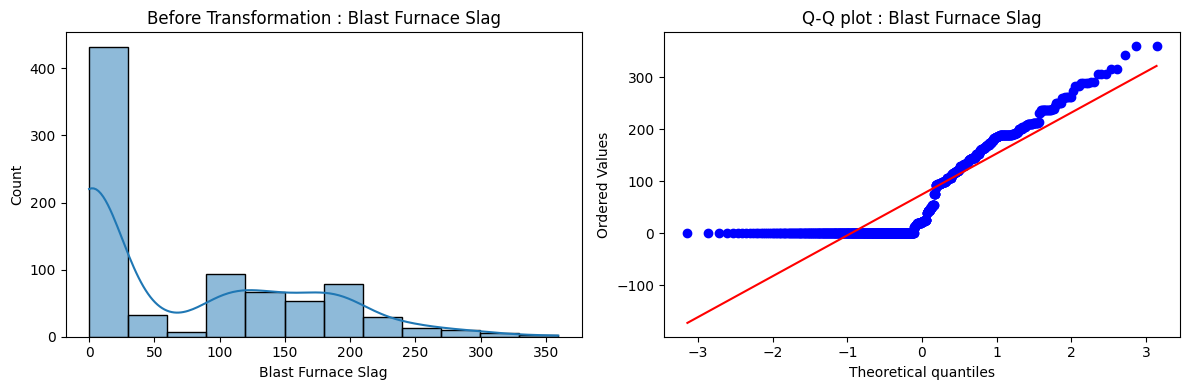

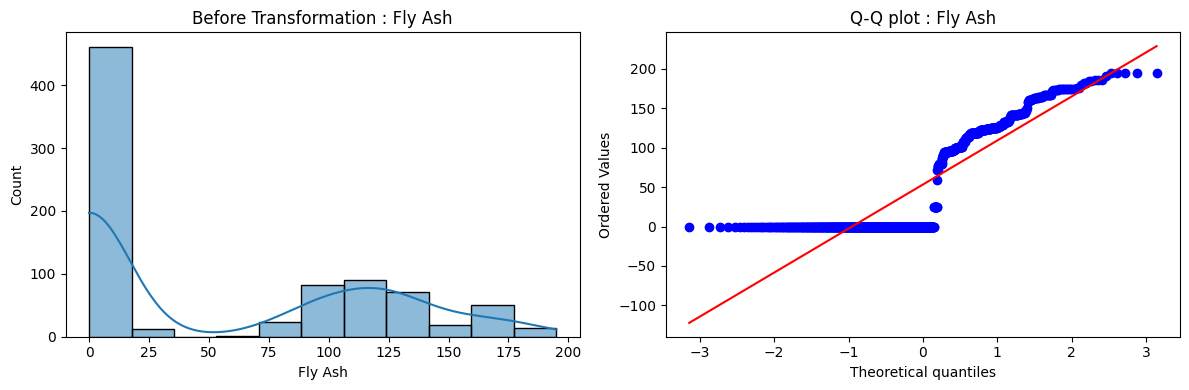

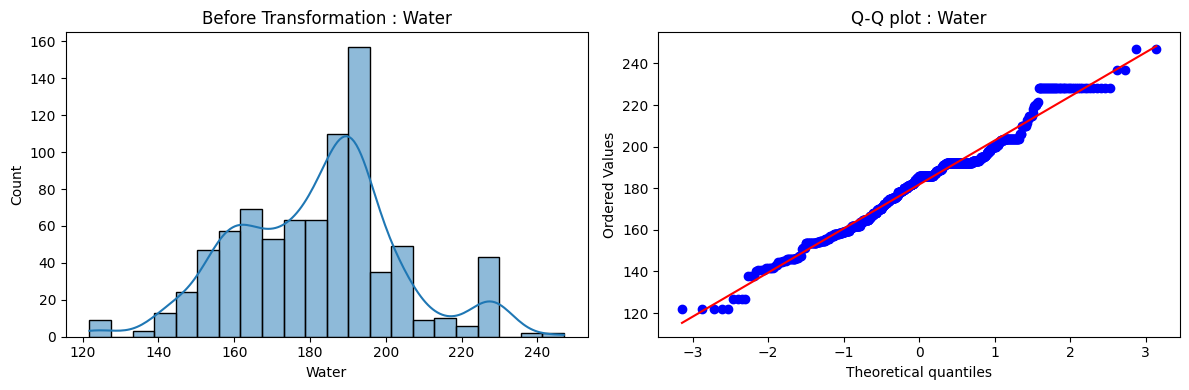

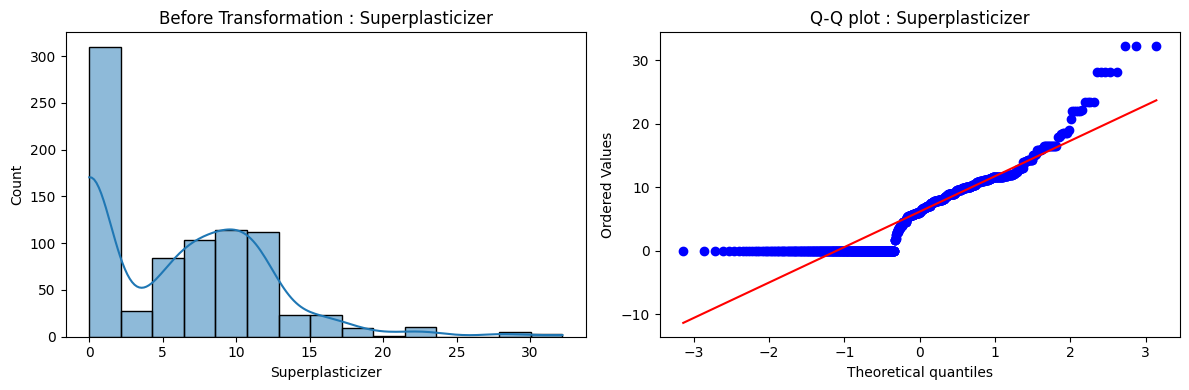

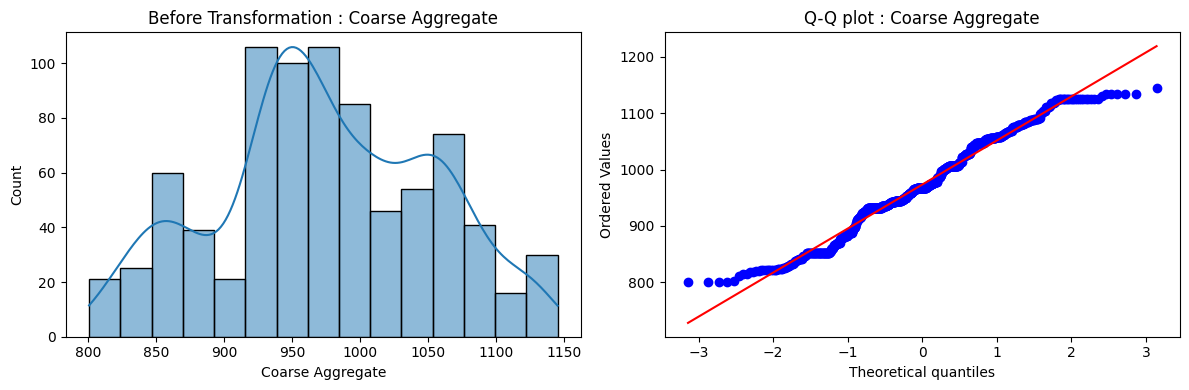

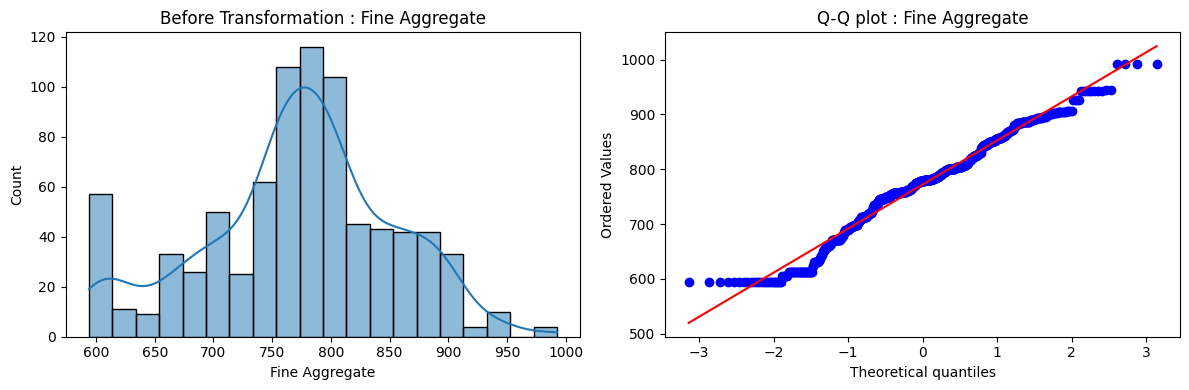

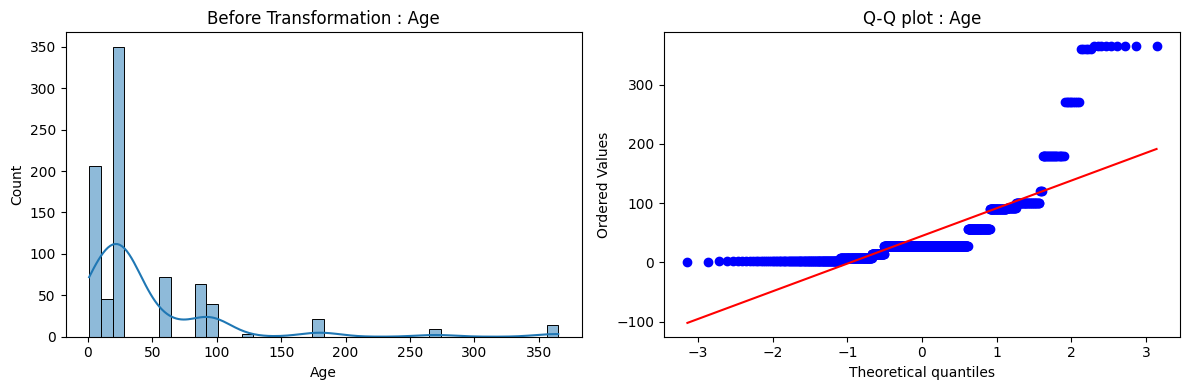

In [28]:
# plotting

for col in X_train.columns:
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Before Transformation : {col}")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"Q-Q plot : {col}")

    plt.tight_layout()
    plt.show()



### **applying transformation**

In [35]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)

pd.DataFrame({'cols': X_train.columns , 'lambdas': pt.lambdas_})

,cols,lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [36]:
lr = LinearRegression();
lr.fit(X_train_transformed , y_train);
y_pred2 = lr.predict(X_test_transformed);
round(r2_score(y_test , y_pred2)*100,2)

80.48

In [37]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X + 0.000001)
lr = LinearRegression()
np.mean(cross_val_score(lr , X_transformed , y , scoring="r2" , cv=10))

np.float64(0.6466764736678003)

In [38]:
pt2 = PowerTransformer(method='yeo-johnson')
X_train_transformed2 = pt2.fit_transform(X_train)
X_test_transformed2 = pt2.transform(X_test)

lr = LinearRegression();
lr.fit(X_train_transformed2 , y_train);
y_pred3 = lr.predict(X_test_transformed2);
print(r2_score(y_test , y_pred3))
pd.DataFrame({'cols': X_train.columns , 'lambdas': pt2.lambdas_})

0.8161906511066099


,cols,lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [39]:
pt2 = PowerTransformer(method='yeo-johnson')
X_transformed2 = pt2.fit_transform(X) # no need to add small constant here
lr = LinearRegression()
np.mean(cross_val_score(lr , X_transformed2 , y , scoring="r2" , cv=5))

np.float64(0.6834625126992433)

In [40]:
pd.DataFrame({'cols': X_train.columns ,'box-cox_lambdas':pt.lambdas_, 'yeo-johnson_lambdas': pt2.lambdas_})

,cols,box-cox_lambdas,yeo-johnson_lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830764
7,Age,0.048975,0.001771
